In [1]:
# importing the images from the zip file
from google.colab import drive
drive.mount('/content/drive') 

!unzip /content/drive/MyDrive/deeplearning/chest_xray2.zip



Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/test/PNEUMONIA/person1938_bacteria_4854.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1940_bacteria_4859.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1940_bacteria_4861.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1940_bacteria_4862.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1941_bacteria_4863.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1942_bacteria_4865.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1943_bacteria_4868.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1944_bacteria_4869.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1945_bacteria_4872.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1946_bacteria_4874.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1946_bacteria_4875.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1947_bacteria_4876.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1949_bacteria_4880.jpeg  
  inflating: chest_xray/te

In [8]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_directory = '/content/chest_xray/train'
validation_directory = '/content/chest_xray/validation'
test_directory = '/content/chest_xray/test'
BatchSize=64

img_height = 255
img_width = 255
numEpochs = 6
BatchSize=64

TrainData = tf.keras.utils.image_dataset_from_directory(
    train_directory, seed=3, validation_split=None, subset=None, batch_size=BatchSize, shuffle=True,image_size=(img_height, img_width),label_mode='categorical')
    
ValidationData = tf.keras.utils.image_dataset_from_directory(
    validation_directory, seed=3, validation_split=None, subset=None,shuffle=False, batch_size=BatchSize,image_size=(img_height, img_width),label_mode='categorical')

TestData = tf.keras.utils.image_dataset_from_directory(
    test_directory, seed=3, validation_split=None,shuffle=False, subset=None, batch_size=879,image_size=(img_height, img_width),label_mode='categorical')


Found 4099 files belonging to 2 classes.
Found 878 files belonging to 2 classes.
Found 879 files belonging to 2 classes.


Resnet

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score , recall_score
from sklearn.metrics import confusion_matrix, precision_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(255,255,3), include_top=False, weights='imagenet')

model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(img_height, img_width, 3)),
         tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
         base_model,
         tf.keras.layers.Dense(8,activation='relu'),
         tf.keras.layers.Dense(5,activation='relu'),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(2,activation="softmax")
])
for layer_ in base_model.layers:
    layer_.trainable = False
    
index_of_train = [87,170];

base_model.layers[index_of_train[1]].trainable = True


model.compile(optimizer="Adam",
              loss="categorical_crossentropy", 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 255, 255, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 dense_3 (Dense)             (None, 8, 8, 8)           16392     
                                                                 
 dense_4 (Dense)             (None, 8, 8, 5)           45        
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 642       
                                                                 
Total params: 23,604,791
Trainable params: 17,079
Non-

In [10]:
history = model.fit(TrainData, epochs=numEpochs, validation_data=ValidationData)

Epoch 1/6
65/65 [==============================] - 905s 14s/step - loss: 0.5474 - accuracy: 0.7302 - val_loss: 0.5214 - val_accuracy: 0.7301
Epoch 2/6
65/65 [==============================] - 899s 14s/step - loss: 0.4371 - accuracy: 0.7873 - val_loss: 0.4141 - val_accuracy: 0.7882
Epoch 3/6
65/65 [==============================] - 900s 14s/step - loss: 0.3709 - accuracy: 0.8292 - val_loss: 0.3861 - val_accuracy: 0.8132
Epoch 4/6
65/65 [==============================] - 900s 14s/step - loss: 0.3373 - accuracy: 0.8446 - val_loss: 0.3674 - val_accuracy: 0.8451
Epoch 5/6
65/65 [==============================] - 901s 14s/step - loss: 0.3003 - accuracy: 0.8690 - val_loss: 0.3376 - val_accuracy: 0.8485
Epoch 6/6
65/65 [==============================] - 898s 14s/step - loss: 0.2705 - accuracy: 0.8868 - val_loss: 0.3713 - val_accuracy: 0.8235


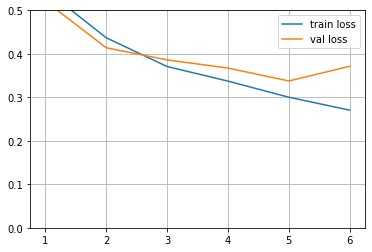

In [11]:
import matplotlib.pyplot as plt

ax = plt.subplot(1,1,1)
line1 = ax.plot(range(1,numEpochs+1),history.history['loss'])
line2 = ax.plot(range(1,numEpochs+1),history.history['val_loss'])
plt.ylim(0,0.5)
plt.legend(["train loss", "val loss"])
plt.grid(visible=True, which='both', axis='both')
plt.show()

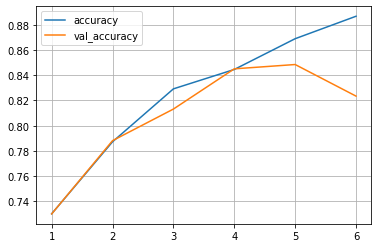

In [12]:
ax = plt.subplot(1,1,1)
line1 = ax.plot(range(1,numEpochs+1),history.history['accuracy'])
line2 = ax.plot(range(1,numEpochs+1),history.history['val_accuracy'])
plt.legend(["accuracy", "val_accuracy"])
plt.grid(visible=True, which='both', axis='both')
plt.show()

In [13]:
loss, accuracy = model.evaluate(TestData)
print("Loss :", loss)
print("Accuracy :", accuracy)

1/1 [==============================] - 177s 177s/step - loss: 0.2227 - accuracy: 0.9295
Loss : 0.2226855307817459
Accuracy : 0.9294652938842773


In [14]:
#confusion matrix
import numpy as np
predictions = model.predict(TestData)
predictions = np.argmin(predictions, axis=1)

test_y = next(TestData.as_numpy_iterator())[1]
test_y = np.argmin(test_y, axis = 1)

confusion_mat = tf.math.confusion_matrix(test_y,predictions)
TP = confusion_mat.numpy()[0,0];
FP = confusion_mat.numpy()[1,0];
FN = confusion_mat.numpy()[0,1];
TN = confusion_mat.numpy()[1,1];

precision=TP / (TP + FP)
recall=TP / (TP + FN)
print("Precision: " + str(precision));
print("Recall: " + str(recall));
print("confusion matrix: " + str(confusion_mat))

Precision: 0.9646869983948636
Recall: 0.9375975039001561
confusion matrix: tf.Tensor(
[[601  40]
 [ 22 216]], shape=(2, 2), dtype=int32)


In [15]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

aug_TrainData = TrainData.map(
  lambda x, y: (data_augmentation(x, training=True), y))

aug_ValidationData = ValidationData.map(
  lambda x, y: (data_augmentation(x, training=True), y))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 255, 255, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 dense_3 (Dense)             (None, 8, 8, 8)           16392     
                                                                 
 dense_4 (Dense)             (None, 8, 8, 5)           45        
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 642       
                                                                 
Total params: 23,604,791
Trainable params: 17,079
Non-

In [17]:
history = model.fit(aug_TrainData, validation_data=aug_ValidationData , batch_size=BatchSize, epochs=numEpochs)

Epoch 1/6
65/65 [==============================] - 961s 15s/step - loss: 0.3982 - accuracy: 0.8068 - val_loss: 0.4026 - val_accuracy: 0.8200
Epoch 2/6
65/65 [==============================] - 959s 15s/step - loss: 0.3590 - accuracy: 0.8224 - val_loss: 0.3747 - val_accuracy: 0.8257
Epoch 3/6
65/65 [==============================] - 959s 15s/step - loss: 0.3517 - accuracy: 0.8365 - val_loss: 0.3568 - val_accuracy: 0.8405
Epoch 4/6
65/65 [==============================] - 959s 15s/step - loss: 0.3355 - accuracy: 0.8463 - val_loss: 0.4074 - val_accuracy: 0.8303
Epoch 5/6
65/65 [==============================] - 957s 15s/step - loss: 0.3205 - accuracy: 0.8514 - val_loss: 0.4381 - val_accuracy: 0.7938
Epoch 6/6
65/65 [==============================] - 959s 15s/step - loss: 0.3348 - accuracy: 0.8446 - val_loss: 0.4974 - val_accuracy: 0.7642


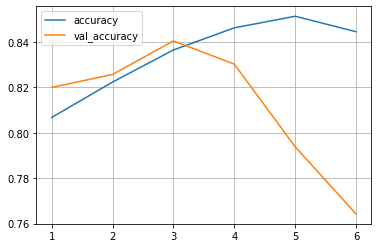

In [19]:
ax = plt.subplot(1,1,1)
line1 = ax.plot(range(1,numEpochs+1),history.history['accuracy'])
line2 = ax.plot(range(1,numEpochs+1),history.history['val_accuracy'])
plt.legend(["accuracy", "val_accuracy"])
plt.grid(visible=True, which='both', axis='both')
plt.show()

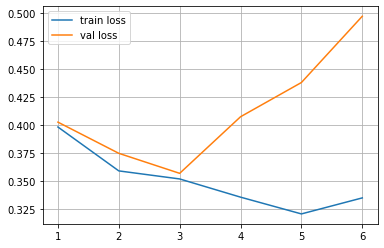

In [21]:
ax = plt.subplot(1,1,1)
line1 = ax.plot(range(1,numEpochs+1),history.history['loss'])
line2 = ax.plot(range(1,numEpochs+1),history.history['val_loss'])
# plt.ylim(0,0.4)
plt.legend(["train loss", "val loss"])
plt.grid(visible=True, which='both', axis='both')
plt.show()

In [22]:
loss, accuracy = model.evaluate(TestData)
print("Loss :", loss)
print("Accuracy :", accuracy)

1/1 [==============================] - 174s 174s/step - loss: 0.3068 - accuracy: 0.9317
Loss : 0.30677762627601624
Accuracy : 0.9317406415939331


In [23]:
#confusion matrix

predictions = model.predict(TestData)
predictions = np.argmin(predictions, axis=1)

test_y = next(TestData.as_numpy_iterator())[1]
test_y = np.argmin(test_y, axis = 1)

confusion_mat = tf.math.confusion_matrix(test_y,predictions)
TP = confusion_mat.numpy()[0,0];
FP = confusion_mat.numpy()[1,0];
FN = confusion_mat.numpy()[0,1];
TN = confusion_mat.numpy()[1,1];

precision=TP / (TP + FP)
recall=TP / (TP + FN)
print("Precision: " + str(precision));
print("Recall: " + str(recall));
print("confusion matrix: " + str(confusion_mat))

Precision: 0.9677938808373591
Recall: 0.9375975039001561
confusion matrix: tf.Tensor(
[[601  40]
 [ 20 218]], shape=(2, 2), dtype=int32)
